## Data was first convoluted then specific heat and susceptibility was calculated??

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import glob
import json
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from multiprocessing import Pool  # for parallel computation
from itertools import repeat  # repeating in iteration


#### font

In [2]:
from matplotlib import rcParams

title_font = {'fontname':'Arial', 'size':'23', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}

axis_font = {'fontname':'Arial', 'size':'23', 'color':'black'}

font = {'family': 'DejaVu Sans',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }

font = {'family': 'DejaVu Sans',
        'color':  'black',
        'size': 16,
        }

inside_font = {'family': 'DejaVu Sans',
        'color':  'black',
        'weight': 'bold',
        'size': 6,
        }

### Directories

In [20]:
out_img_dir = "./graphs/"
out_data_dir = "./calculated_data/"
in_data_dir = "./data/periodic/critical/"
# in_data_dir = "./data_new/"
in_data_dir = "./data_2018.11.26/"
in_data_dir = "./data_2018.11.26/calculated/entropy-order-parameter/"
in_data_dir = "./data_2019.04.26/convoluted/"
in_data_dir = "./data_2019.04.26/convolution-by-old-program/"

In [21]:
# os.listdir(in_data_dir)

In [22]:
signature = ["sq_lattice_site_percolation_periodic_",
             "sq_lattice_site_percolation_ballistic_deposition_L1",
             "sq_lattice_site_percolation_ballistic_deposition_L2"]

In [25]:
interaction = 0 #L0, L1, L2
files = glob.glob(in_data_dir + signature[interaction] + "*.txt")

In [26]:
files

['./data_2019.04.26/convolution-by-old-program/sq_lattice_site_percolation_periodic__L300_2019-04-25_223026.csv_convoluted.txt',
 './data_2019.04.26/convolution-by-old-program/sq_lattice_site_percolation_periodic__L400_2019-04-26_005255.csv_convoluted.txt',
 './data_2019.04.26/convolution-by-old-program/sq_lattice_site_percolation_periodic__L200_2019-04-25_215023.csv_convoluted.txt',
 './data_2019.04.26/convolution-by-old-program/sq_lattice_site_percolation_periodic__L100_2019-04-25_215004.csv_convoluted.txt',
 './data_2019.04.26/convolution-by-old-program/sq_lattice_site_percolation_periodic__L350_2019-04-25_233842.csv_convoluted.txt',
 './data_2019.04.26/convolution-by-old-program/sq_lattice_site_percolation_periodic__L150_2019-04-25_215015.csv_convoluted.txt',
 './data_2019.04.26/convolution-by-old-program/sq_lattice_site_percolation_periodic__L250_2019-04-25_215441.csv_convoluted.txt']

In [27]:
def calculate_specific_heat(p, H):
    T = 1-p
#     C = T[1:]*np.diff(H)/np.diff(T)
    C = - T[1:] * np.diff(H) * L**2
    return C

def calculate_susceptibility(p, P):
    return np.diff(P)/np.diff(p)

{'length': 300, 'ensemble_size': 10000, 'time_stamp': '2019-04-25_223026', 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 400, 'ensemble_size': 10000, 'time_stamp': '2019-04-26_005255', 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 200, 'ensemble_size': 10000, 'time_stamp': '2019-04-25_215023', 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 100, 'ensemble_size': 10000, 'time_stamp': '2019-04-25_215004', 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 350, 'ensemble_size': 10000, 'time_stamp': '2019-04-25_233842', 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 150, 'ensemble_size': 10000, 'time_stamp': '2019-04-25_215015', 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 250, 'ensemble_size': 10000, 'time_stamp': '2019-04-25_215441', 'signature': 'sq_lattice_site_percolation_periodic_'}


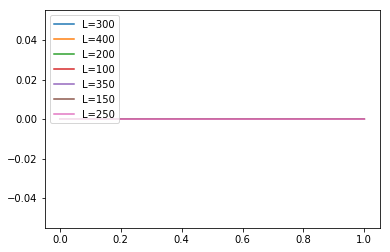

In [28]:
data = dict()

for file in files:
    f = open(file)
    l = f.readline()
    if l[0] == '#':
        l = l[1:]
        pass
    head = json.loads(l)
    print(head)
    L = head['length']
#     p, H, P = np.loadtxt(file, usecols=(0,1,2), unpack=True)
    p, H = np.loadtxt(file, usecols=(0,1), unpack=True, delimiter=',')
#     T = (1-p)
#     C = - T[1:] * np.diff(H) * L**2
#     X = np.diff(P) * L**2
    p = np.linspace(1/L**2, 1, L**2)
    
    C = calculate_specific_heat(p,H)
#     X = calculate_susceptibility(p,P) / (2*L**2)
    
    C = np.append([0], C)
#     X = np.append([0], X)

#     data[L] = [p, H, P, C, X]
    data[L] = [p, H, C]
    plt.plot(p, H, label='L={}'.format(L))
    pass
plt.legend()
# plt.xlim(0.4, 0.8)

(0.5, 0.7)

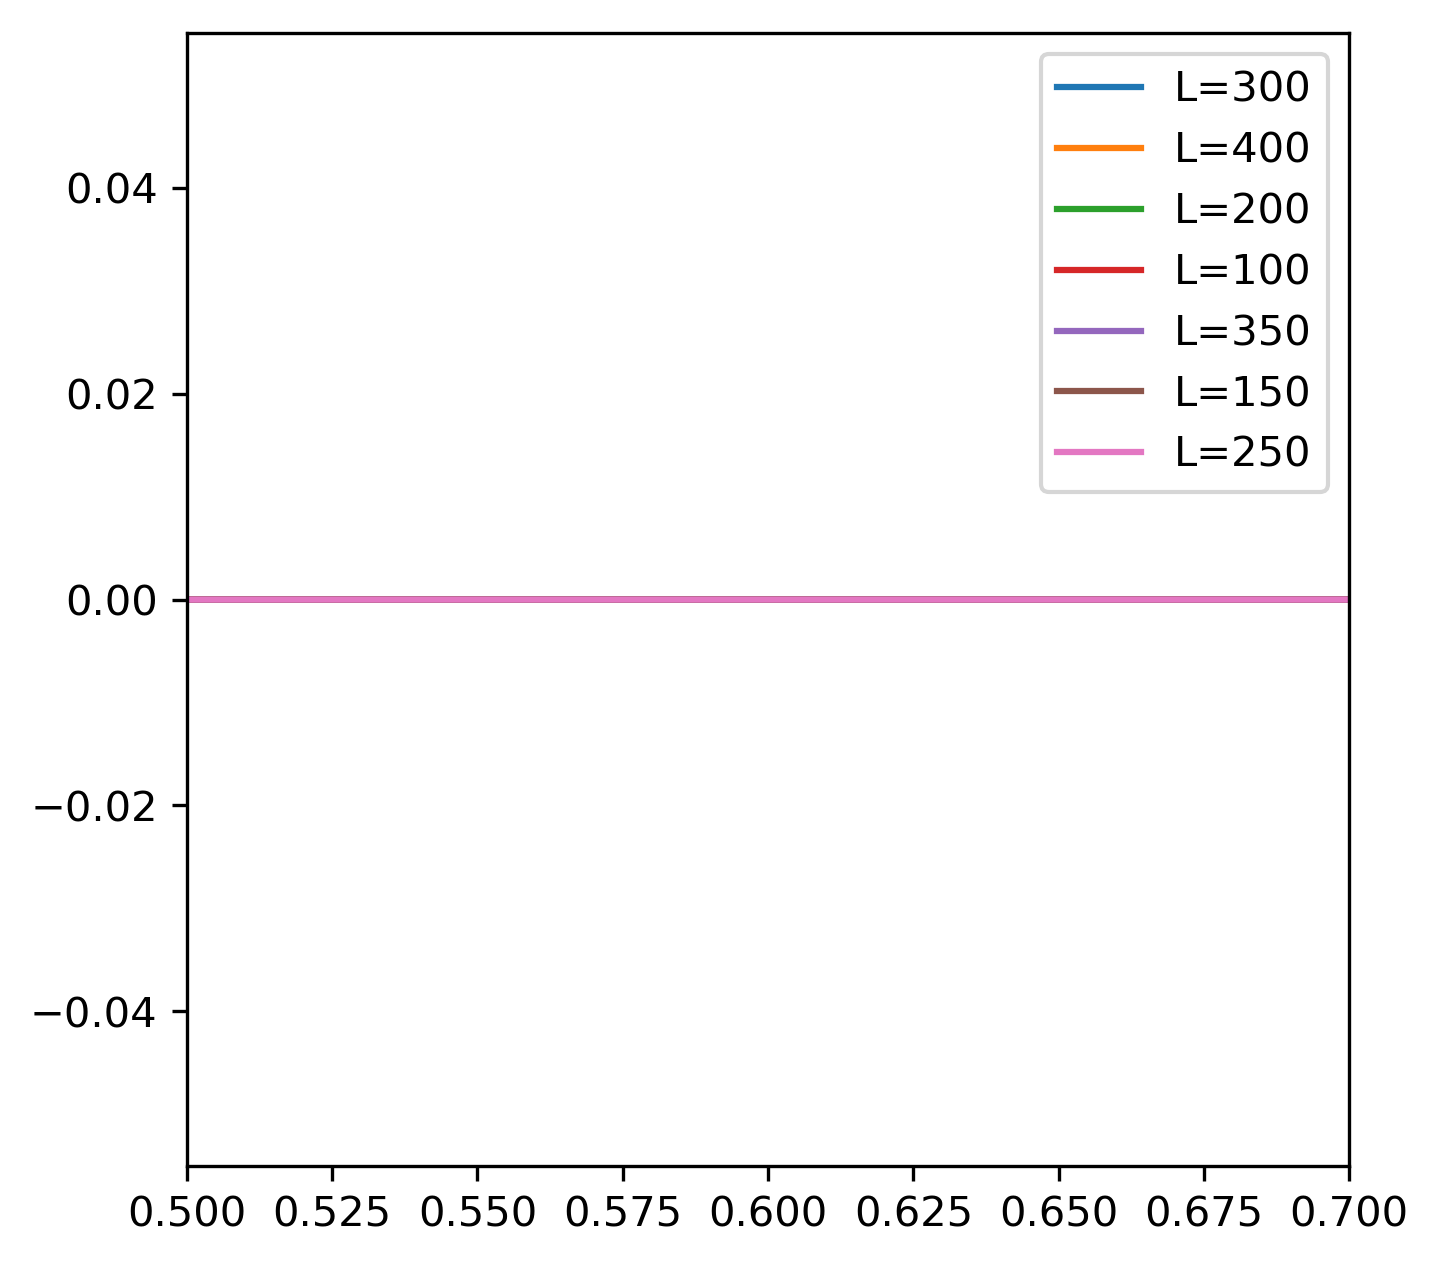

In [29]:
figure = plt.figure(figsize=(5,5), dpi=300)
max_points = []
for L in data:
#     if L == 400:
#         continue
#     p, H, P, C, X = data[L]
    p, H, C = data[L]
    plt.plot(p, C, label='L={}'.format(L))
#     plt.plot(p, X, label='L={}'.format(L))
    C_max = np.max(C)
#     X_max = np.max(X)
#     max_points.append([L, C_max, X_max])
    max_points.append([L, C_max])
    pass
plt.legend()
plt.xlim(0.5, 0.7)

In [17]:
max_points = np.array(max_points)

In [12]:
max_points

array([[150.        ,  31.74536465,  17.55535   ],
       [250.        ,  44.25268715,  24.23245   ],
       [200.        ,  38.39162832,  21.13365   ],
       [100.        ,  24.2882899 ,  13.374905  ],
       [400.        ,  60.73764417,  33.3525    ],
       [300.        ,  49.85659224,  27.3664    ],
       [350.        ,  55.6405785 ,  30.48425   ]])

In [13]:
log_max = np.log(max_points)

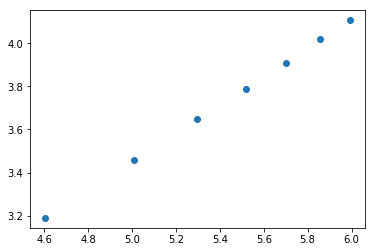

In [14]:
plt.plot(log_max[:,0], log_max[:,1], 'o')
# plt.plot(log_max[:,0], log_max[:,2], 'o')

In [15]:
lin_regress_specific_heat = stats.linregress(log_max[:,0], log_max[:,1])
lin_regress_susceptibility = stats.linregress(log_max[:,0], log_max[:,2])

In [16]:
lin_regress_specific_heat

LinregressResult(slope=0.6597315323213944, intercept=0.15110547101763938, rvalue=0.9999530975813753, pvalue=2.893550220159481e-11, stderr=0.0028576572274063524)

In [17]:
lin_regress_susceptibility

LinregressResult(slope=0.6549775195898315, intercept=-0.42154705259143777, rvalue=0.9998945290792678, pvalue=2.1941238804665105e-10, stderr=0.004254584119387458)